In [ ]:
Python needs a MongoDB driver to access the MongoDB database.

In this tutorial we will use the MongoDB driver "PyMongo".

We recommend that you use PIP to install "PyMongo".

In [2]:
!pip install pymongo


In [ ]:
MongoDB is a popular unstructured database 

unprecedented pace,scale and size of data -nowadays
Facebook generates four petabytes of data in just one day
Google generates twenty petabytes of data every day


MongoDB is an unstructured database.
It stores data in the form of documents.
MongoDB is able to handle huge volumes of data very efficiently and is the most widely used
NoSQL database as it offers rich query language and flexible and fast access to data.

In [ ]:
collection (table)----- document (record) 

In [ ]:
The Architecture of a MongoDB Database

The information in MongoDB is stored in documents. 
Here, a document is analogous to rows in structured databases.

Each document is a collection of key-value pairs
Each key-value pair is called a field
Every document has an _id  field, which uniquely identifies the documents
A document may also contain nested documents
Documents may have a varying number of fields (they can be blank as well)
These documents are stored in a collection. 
A collection is literally a collection of documents in MongoDB. 
This is analogous to tables in traditional databases.

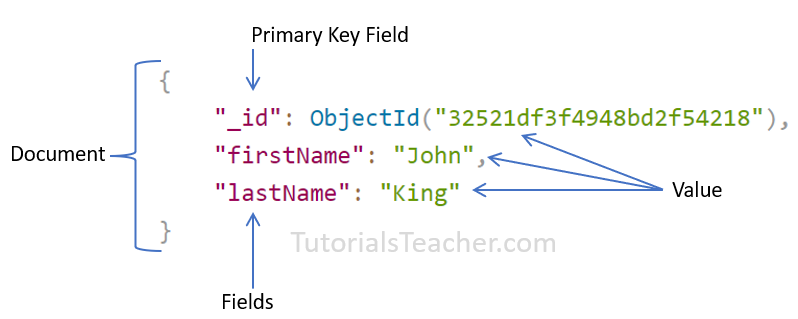

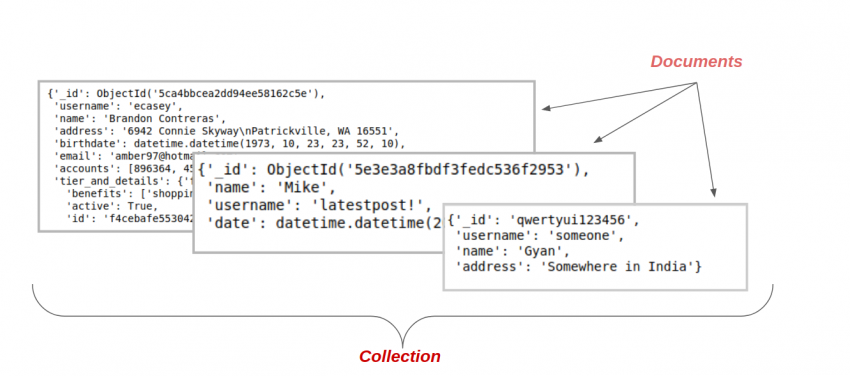

In [ ]:
PyMongo

PyMongo is a Python library that enables us to connect with MongoDB.
It allows us to perform basic operations on the MongoDB database.

In [ ]:
Connecting to the Database

In [1]:
import pymongo 
#import pprint
mongo_uri = "mongodb://localhost:27017/"  
myclient = pymongo.MongoClient(mongo_uri)
#The MongoClient class is a class that allows for making Connections to MongoDB.
#To connect your application with your local MongoDB database, 
#you need to connect MongoDB on localhost 27017 port.

In [ ]:
Let’s see the available databases:

In [36]:
myclient.list_database_names()

['admin', 'config', 'dummydatabase', 'local', 'mylibrary']

In [4]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["MScDS"]  # creating database


In [5]:
myclient.list_database_names()


['admin', 'config', 'dummydatabase', 'local', 'mylibrary']

In [ ]:
In MongoDB, a database is not created until it gets content!

In [6]:
mycol = mydb["Students"]   # creating collection

In [ ]:
In MongoDB, a collection is not created until it gets content!

In [9]:
myclient.list_database_names()

['admin', 'config', 'dummydatabase', 'local', 'mylibrary']

In [11]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["MScDS"]  # creating database

mycol = mydb["Students"]   # creating collection

mydict = { "name": "John", "address": "Highway 37" }

x = mycol.insert_one(mydict)

In [12]:
myclient.list_database_names()


['MScDS', 'admin', 'config', 'dummydatabase', 'local', 'mylibrary']

In [13]:
db = myclient.MScDS

In [ ]:
The list_collection_names command shows the names of all the available collections:

In [43]:
db.list_collection_names()

['Students']

In [15]:
mydict = { "name": "Anagha", "address": "CLT" }

x = mycol.insert_one(mydict)

In [ ]:
Let’s see the number of students we have. 

In [16]:

db.Students.count_documents({}) #gives the number of documents in the table

2

In [ ]:
Insert Multiple Documents
To insert multiple documents into a collection in MongoDB, we use the insert_many() method.

The first parameter of the insert_many() method is a list
containing dictionaries with the data you want to insert:

In [17]:
mylist = [
  { "name": "Arahti", "address": "KLM"},
  { "name": "Jumana", "address": "TVM"},
  { "name": "Richard", "address": "EKM"},
  { "name": "Susan", "address": "KNR"},
  { "name": "Anas", "address": "Yellow Garden 2"},
  ]

x = mycol.insert_many(mylist)

In [18]:
table=db.Students
table.count_documents({}) #gives the number of documents in the table

7

In [ ]:
Retrieving / Fetching the Data
First, let’s fetch a single document from the MongoDB collection. 
We’ll use the find_one function for this purpose:

In [ ]:
Find One
To select data from a collection in MongoDB, we can use the find_one() method.

The find_one() method returns the first occurrence in the selection.

In [19]:
db.Students.find_one()

{'_id': ObjectId('6378b594a03f43de9951a76d'),
 'name': 'John',
 'address': 'Highway 37'}

In [ ]:
Find All
To select data from a table in MongoDB, we can also use the find() method.

The find() method returns all occurrences in the selection.

The first parameter of the find() method is a query object. 
In this example we use an empty query object, which selects all documents in the collection.

In [20]:
for x in mycol.find():
  print(x)

{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'CLT'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Arahti', 'address': 'KLM'}
{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Susan', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [50]:
for x in mycol.find({},{ "_id": 0, "name": 1, "address":1}):
  print(x)

{'name': 'John', 'address': 'Highway 37'}
{'name': 'Anagha', 'address': 'CLT'}
{'name': 'Arahti', 'address': 'KLM'}
{'name': 'Jumana', 'address': 'TVM'}
{'name': 'Richard', 'address': 'EKM'}
{'name': 'Susan', 'address': 'KNR'}
{'name': 'Anas', 'address': 'Yellow Garden 2'}


In [ ]:
You are not allowed to specify both 0 and 1 values in the same object
(except if one of the fields is the _id field). If you specify a field with the value 0, 
all other fields get the value 1, and vice versa:

In [51]:

for x in mycol.find({},{ "address": 0 }):
  print(x)

{'_id': ObjectId('637878faaa6b899f6cc7a789'), 'name': 'John'}
{'_id': ObjectId('6378792aaa6b899f6cc7a78a'), 'name': 'Anagha'}
{'_id': ObjectId('63787948aa6b899f6cc7a78b'), 'name': 'Arahti'}
{'_id': ObjectId('63787948aa6b899f6cc7a78c'), 'name': 'Jumana'}
{'_id': ObjectId('63787948aa6b899f6cc7a78d'), 'name': 'Richard'}
{'_id': ObjectId('63787948aa6b899f6cc7a78e'), 'name': 'Susan'}
{'_id': ObjectId('63787948aa6b899f6cc7a78f'), 'name': 'Anas'}


In [ ]:
Filter the Result
When finding documents in a collection, you can filter the result by using a query object.

The first argument of the find() method is a query object, and is used to limit the search.

In [21]:
myquery = { "address": "KLM" }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Arahti', 'address': 'KLM'}


In [ ]:
Advanced Query
To make advanced queries you can use modifiers as values in the query object.

E.g. to find the documents where the "address" field starts with the letter "S" or higher (alphabetically), 
use the greater than modifier: {"$gt": "S"}:

In [22]:
myquery = { "address": { "$gt": "S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [ ]:
Filter With Regular Expressions
You can also use regular expressions as a modifier.

In [23]:
myquery = { "address": { "$regex": "^T" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}


In [ ]:
Sort the Result
Use the sort() method to sort the result in ascending or descending order.

The sort() method takes one parameter for "fieldname" and one parameter for "direction" 
(ascending is the default direction).

In [24]:
mydoc = mycol.find().sort("name")

for x in mydoc:
  print(x)

{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'CLT'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Arahti', 'address': 'KLM'}
{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Susan', 'address': 'KNR'}


In [ ]:
Sort Descending
Use the value -1 as the second parameter to sort descending.

sort("name", 1) #ascending
sort("name", -1) #descending

In [25]:
mydoc = mycol.find().sort("name", -1)

for x in mydoc:
  print(x)

{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Susan', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Arahti', 'address': 'KLM'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'CLT'}


In [ ]:
Update Collection
You can update a record, or document as it is called in MongoDB, by using the update_one() method.

The first parameter of the update_one() method is a query object defining which document to update.

In [ ]:
If the query finds more than one record, only the first occurrence is updated.

In [26]:
myquery = { "address": "CLT" }
newvalues = { "$set": { "address": "Canyon 123" } }

mycol.update_one(myquery, newvalues)


for x in mycol.find():
  print(x)

{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'Canyon 123'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Arahti', 'address': 'KLM'}
{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Susan', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [ ]:
Update Many
To update all documents that meets the criteria of the query, use the update_many() method.

In [28]:
myquery = { "address": { "$regex": "^K" } }
newvalues = { "$set": { "name": "Minnie" } }

x = mycol.update_many(myquery, newvalues)

print(x.modified_count, "documents updated.")

0 documents updated.


In [29]:
for x in mycol.find():
  print(x)

{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'Canyon 123'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Minnie', 'address': 'KLM'}
{'_id': ObjectId('6378b70ea03f43de9951a770'), 'name': 'Jumana', 'address': 'TVM'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Minnie', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [ ]:
Limit the Result
To limit the result in MongoDB, we use the limit() method.

The limit() method takes one parameter, a number defining how many documents to return.

In [30]:
myresult = mycol.find().limit(3)

#print the result:
for x in myresult:
  print(x)

{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'Canyon 123'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Minnie', 'address': 'KLM'}


In [61]:
Delete Document
To delete one document, we use the delete_one() method.

The first parameter of the delete_one() method is a query object defining which document to delete.

SyntaxError: invalid syntax (Temp/ipykernel_13932/1864326361.py, line 1)

In [31]:
myquery = { "address": "TVM" }

mycol.delete_one(myquery)

for x in mycol.find():
  print(x)



{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'Canyon 123'}
{'_id': ObjectId('6378b70ea03f43de9951a76f'), 'name': 'Minnie', 'address': 'KLM'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Minnie', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [32]:
myquery = { "address": { "$regex": "^K" } }

mycol.delete_one(myquery)

for x in mycol.find():
  print(x)

{'_id': ObjectId('6378b594a03f43de9951a76d'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6378b68da03f43de9951a76e'), 'name': 'Anagha', 'address': 'Canyon 123'}
{'_id': ObjectId('6378b70ea03f43de9951a771'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6378b70ea03f43de9951a772'), 'name': 'Minnie', 'address': 'KNR'}
{'_id': ObjectId('6378b70ea03f43de9951a773'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [48]:
myquery = { "address": "CLT" }

mycol.delete_one(myquery)

for x in mycol.find():
  print(x)

{'_id': ObjectId('6369dff90d51bdfe0ec89ebb'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('6369e0780d51bdfe0ec89ebd'), 'name': 'Arahti', 'address': 'KLM'}
{'_id': ObjectId('6369e0780d51bdfe0ec89ebf'), 'name': 'Richard', 'address': 'EKM'}
{'_id': ObjectId('6369e0780d51bdfe0ec89ec0'), 'name': 'Susan', 'address': 'One way 98'}
{'_id': ObjectId('6369e0780d51bdfe0ec89ec1'), 'name': 'Anas', 'address': 'Yellow Garden 2'}


In [ ]:
Delete Many Documents
To delete more than one document, use the delete_many() method.

The first parameter of the delete_many() method is a query object defining which documents to delete.

In [33]:
myquery = { "address": {"$regex": "^K"} }

x = mycol.delete_many(myquery)

print(x.deleted_count, " documents deleted.")

1  documents deleted.


In [ ]:
Delete All Documents in a Collection
To delete all documents in a collection, pass an empty query object to the delete_many() method:

In [34]:
x = mycol.delete_many({})

print(x.deleted_count, " documents deleted.")

4  documents deleted.


In [ ]:
Delete Collection
You can delete a table, or collection as it is called in MongoDB, by using the drop() method.

In [35]:
mycol.drop()